# Let's create the markdown content as a string
markdown_content = """
# BERTopic Analysis Overview

## Introduction to BERTopic
BERTopic is an advanced topic modeling technique that utilizes 🤗 transformers and class-based TF-IDF (c-TF-IDF) to generate dense clusters for easily interpretable topics. It supports various topic modeling techniques, making it a versatile tool for extracting meaningful topics from large text corpora.

## Quick Start Guide
For a detailed guide on getting started with BERTopic, visit the [official documentation](https://maartengr.github.io/BERTopic/index.html).

You may need to update some nessisary dependencies, see below

## Dataset
For this analysis, a subset of 10,000 documents from the fetch_20newsgroups dataset was used. Adjustments were made based on system capabilities and the focus was on refining topic quality and interpretability.

## Topic Modeling with BERTopic
The BERTopic model was configured to automatically determine the optimal number of topics using the auto setting. This approach provided a balance between granularity and coherence in the topics identified

## Results and Visualization
The analysis yielded a diverse set of topics, with automatic topic reduction helping to focus on the most relevant topics. Various visualizations were employed to explore the topic structure, including topic distribution, term contribution, and hierarchical topic relationships.

#### Topic Visualization: Showcased the distribution and relationship between topics.
#### Topic Probability Distribution: Highlighted the topic composition for specific documents.
#### Topic Term Barchart: Provided insights into the most contributing words for the top N topics.
#### Hierarchical Topic Visualization: Offered a view of how topics are related to each other in a hierarchical structure.
#### Term-Term Matrix and Heatmap: Further explored the correlation between topics.

## Conclusion
This BERTopic analysis demonstrates the power of leveraging transformer models and c-TF-IDF for topic modeling, even with a limited dataset. The approach taken ensures a balance between customizability and generalizability, aiming for meaningful topic extraction that can be applied across various datasets.

In [27]:
#!pip install bertopic
#!pip install --upgrade nltk
#!pip install --upgrade bertopic
#!pip install --upgrade sentence_transformers
#!pip install --upgrade transformers
#!pip install --upgrade numpy pandas scipy scikit-learn
#!pip install --upgrade tensorflow torch transformers bertopic
#!pip install matplotlib plotly seaborn
#!pip install --upgrade scipy numpy plotly


#have to do it for one of berts requirements, remember to upgrade back later, use: 
#!pip install "numpy<=1.23" 
#!pip install "pandas<2.2.1" #might not be nessisary
#!pip install "tensorflow<2.15.0" #might not be nessisary
#!pip install "opencv-python<4.9.0.80" #might not be nessisary

#check numpy version
import numpy
print(numpy.__version__)


#TO REINSTALL
#!pip install --upgrade numpy pandas tensorflow opencv-python

1.23.0


In [2]:
from bertopic import BERTopic

2024-03-04 16:16:10.815876: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
smaller_docs = docs[:10000]  # Adjust the number based on your system's capability, was causing a crash before
#needed about 10k to start to get good topics, good to know


In [6]:
#smaller_docs

In [15]:
#topic_model = BERTopic()
#topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", nr_topics="auto")
#topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", nr_topics=10) #force the number of topics with limited data :/
#topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", nr_topics=10, calculate_probabilities=True) #to fix topic probobilty portion
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2", nr_topics="auto", calculate_probabilities=True)
topics, probs = topic_model.fit_transform(smaller_docs)


In [17]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3649,-1_the_to_of_and,"[the, to, of, and, is, in, that, it, for, you]",[Conviction of Sin\n\n\t\tA meta-exegetical or...
1,0,933,0_game_he_team_the,"[game, he, team, the, was, in, 10, play, year,...","[\n\n\nSorry, Nelson, but you forgot to ask me..."
2,1,818,1_jpeg_00_scsi_for,"[jpeg, 00, scsi, for, gif, card, image, with, ...","[HI,\n that might look like a dull request, bu..."
3,2,435,2_the_of_and_were,"[the, of, and, were, in, they, armenian, was, ...",[Accounts of Anti-Armenian Human Right Violati...
4,3,407,3_god_of_that_is,"[god, of, that, is, the, not, to, and, he, in]",[IMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM...
...,...,...,...,...,...
78,77,12,77_lock_kryptonite_cable_locks,"[lock, kryptonite, cable, locks, bicycle, cobr...","[Greetings netters,\n\nSteve writes ... <about..."
79,78,11,78_room_near_kitchen_sublet,"[room, near, kitchen, sublet, living, bedroom,...",[For sale by owners who were also the builders...
80,79,11,79_w4wg_lan_mail_workgroups,"[w4wg, lan, mail, workgroups, network, vax, ga...","[\n\n\n\nHey, sounds great. Does that mean tha..."
81,80,11,80_8051_eprom_hc11_signetics,"[8051, eprom, hc11, signetics, microcontroller...",[Could someone point me toward a source (FTP/B...


###  Topic Visualization
Visualize the topics to get a sense of how they are distributed and how much each topic contributes to the dataset.

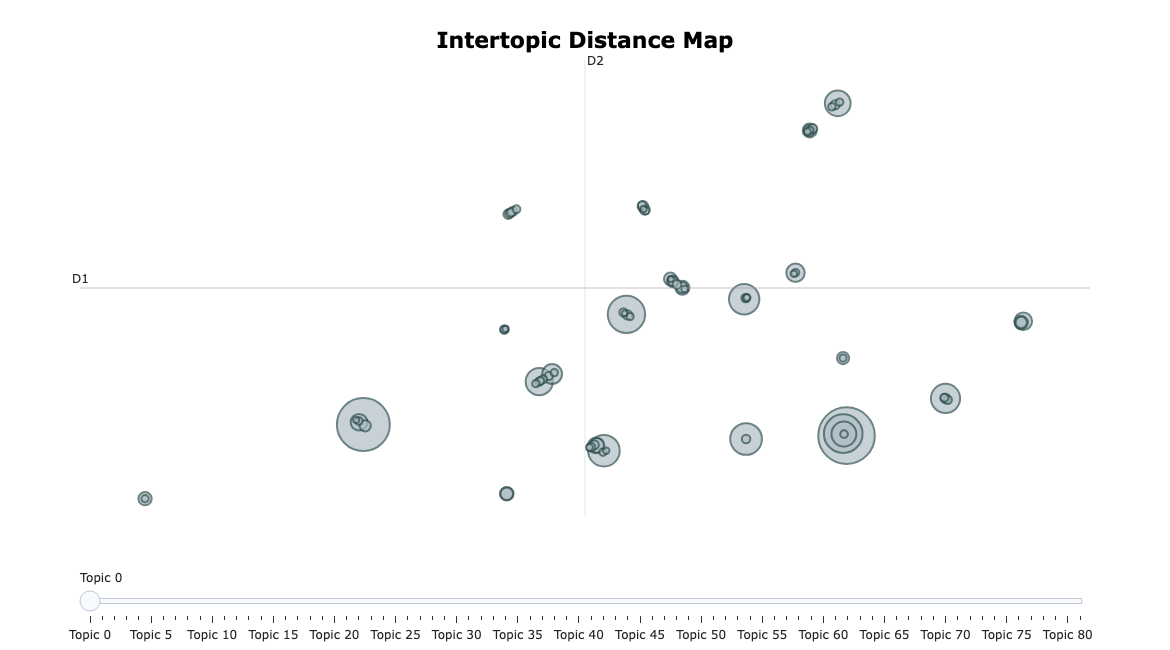

In [18]:
topic_model.visualize_topics()

### Topic Probability Distribution
For a given document, visualize the probability distribution across topics. This can be particularly useful to understand the topic composition of specific documents.

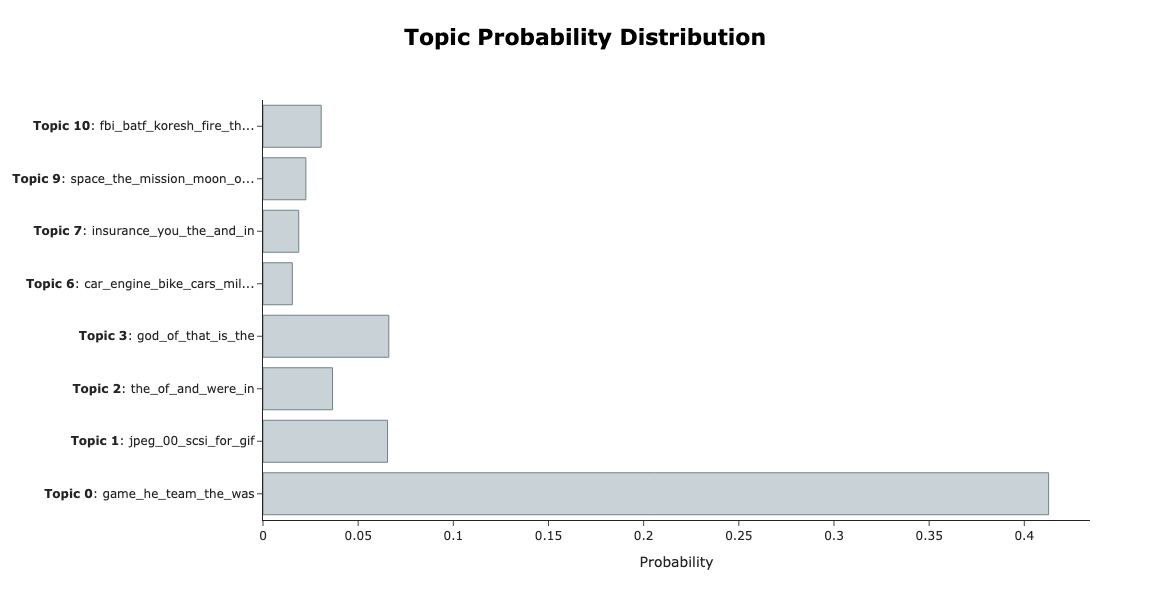

In [19]:
# Replace `0` with the index of the document you are interested in
topic_model.visualize_distribution(probs[0], min_probability=0.015)


### Topic Term Barchart
To get a clear picture of what words contribute to a topic, you can visualize the terms that are most important for a topic.

This will give you a barchart for the top N topics, showing the most contributing words for each topic. Adjust top_n_topics to display more or fewer topics.

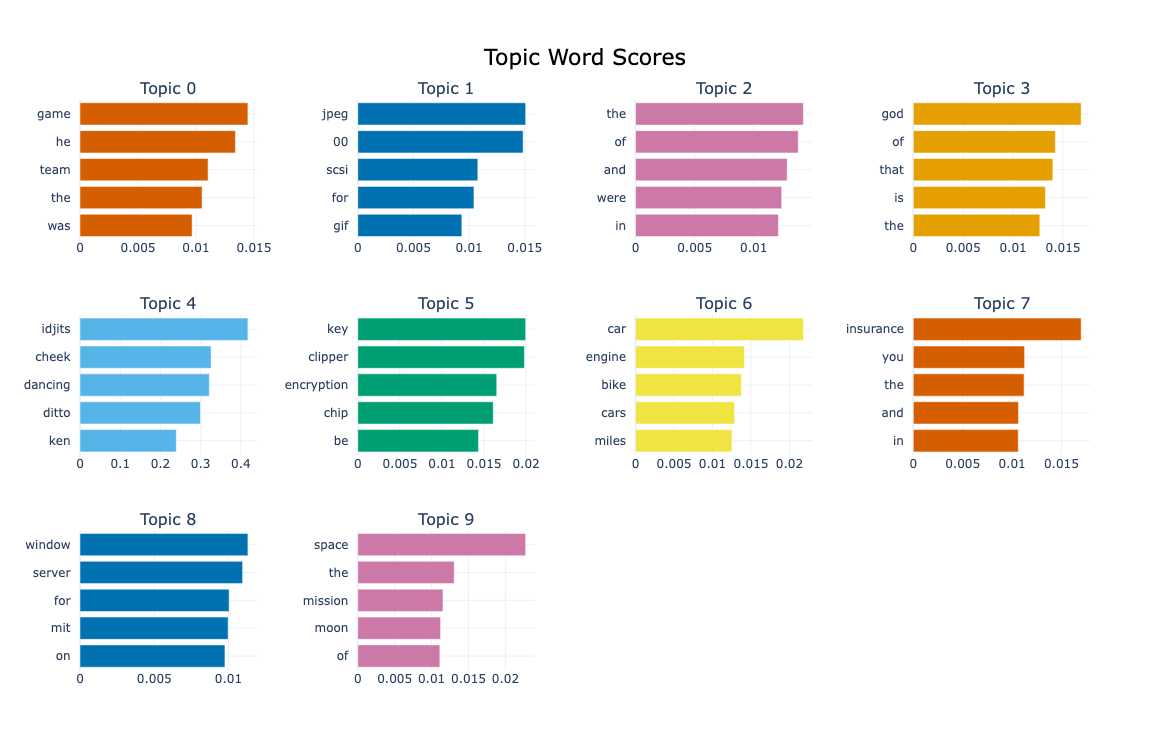

In [22]:
# Replace `0` with the topic number you are interested in
topic_model.visualize_barchart(top_n_topics=10)


### Hierarchical Topic Visualization
Understanding the hierarchical relationship between topics can also be insightful.

This visualization shows how topics are related to each other in a hierarchical structure, which can be useful for understanding the topic structure at a glance.

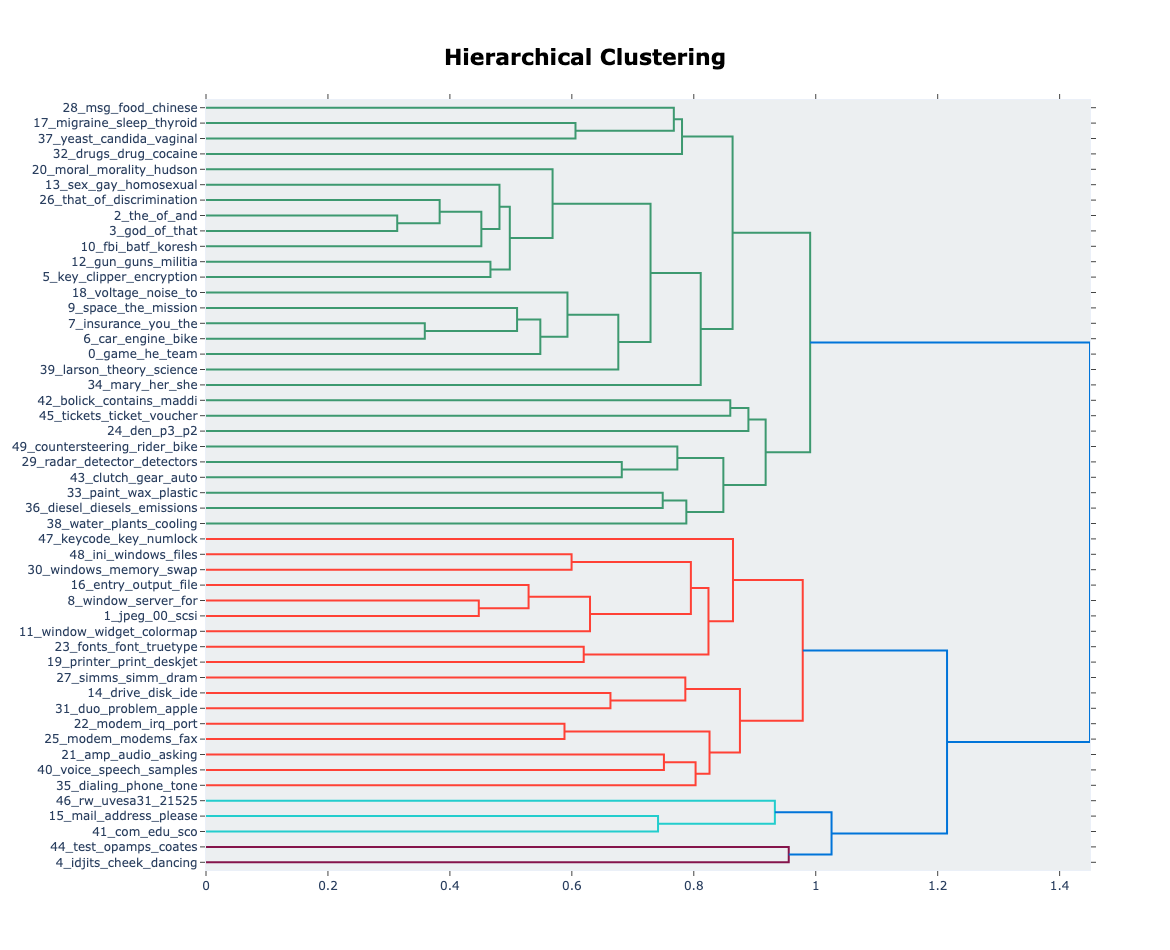

In [23]:
topic_model.visualize_hierarchy(top_n_topics=50)


### Term-Term Matrix
To understand how terms contribute across topics, you can visualize the term-term matrix.

This visualization helps in understanding the ranking and distribution of terms across different topics.

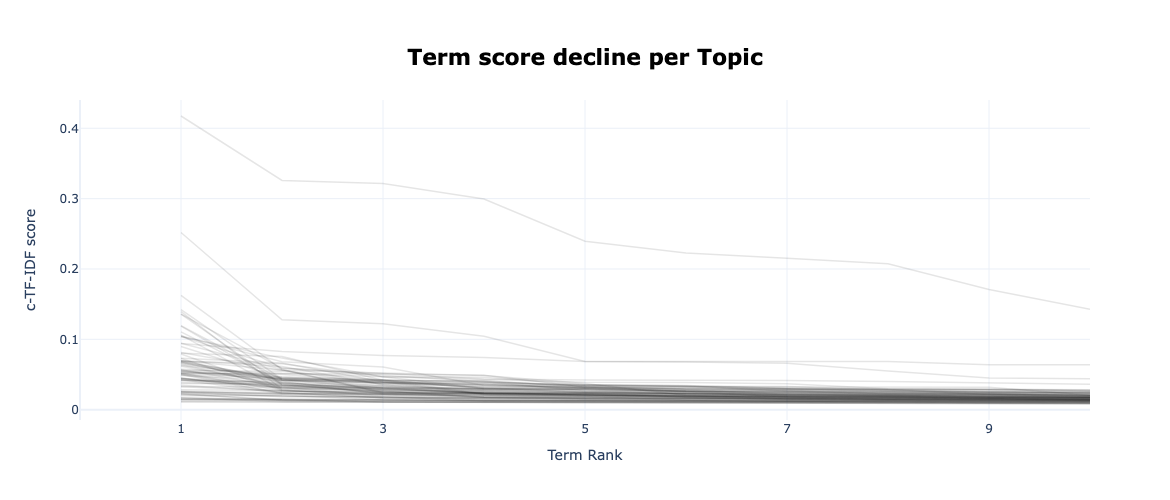

In [24]:
topic_model.visualize_term_rank()


### Heatmap
A heatmap can be useful to visualize the correlation between topics.

This shows how topics are correlated, providing insights into topics that might be closely related.

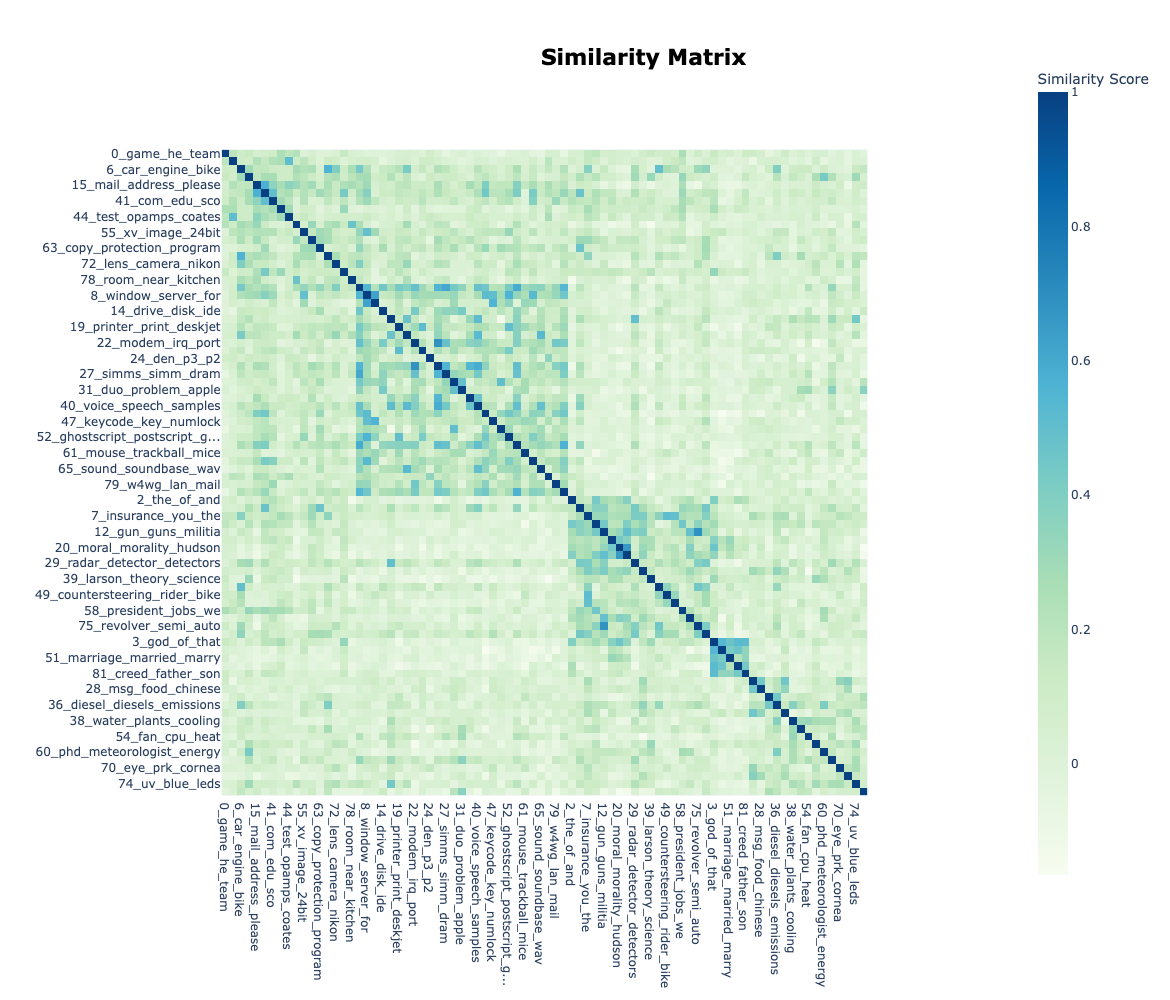

In [25]:
topic_model.visualize_heatmap(n_clusters=5, width=1000, height=1000)